In [2]:
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.append("..")
from generative_models import utils

/home/luca/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [13]:
timesteps = 90

generated_data_filepaths = ['../generative_models/wgan_gp/outputs/final/2018-06-07_17-28-47/generated_datasets/100000_generated_data.npy',
                            '../generative_models/wgan_gp/outputs/final/2018-06-07_17-28-47/generated_datasets/200000_generated_data.npy',
                            '../generative_models/wgan_gp/outputs/final/2018-06-07_17-28-47/generated_datasets/300000_generated_data.npy',
                            '../generative_models/wgan_gp/outputs/final/2018-06-07_17-28-47/generated_datasets/400000_generated_data.npy',
                            '../generative_models/wgan_gp/outputs/final/2018-06-07_17-28-47/generated_datasets/500000_generated_data.npy',
                            '../generative_models/wgan_gp/outputs/final/2018-06-07_17-28-47/generated_datasets/600000_generated_data.npy',
                            '../generative_models/wgan_gp/outputs/final/2018-06-07_17-28-47/generated_datasets/700000_generated_data.npy',
                            '../generative_models/wgan_gp/outputs/final/2018-06-07_17-28-47/generated_datasets/800000_generated_data.npy',
                            '../generative_models/wgan_gp/outputs/final/2018-06-07_17-28-47/generated_datasets/900000_generated_data.npy',
                            '../generative_models/wgan_gp/outputs/final/2018-06-07_17-28-47/generated_datasets/1000000_generated_data.npy']
transactions_filepath = '../../datasets/berka_dataset/usable/normalized_transactions_months.npy'
labels = ['100k', '200k','300k','400k','500k','600k','700k','800k','900k','1M']

real_data = utils.load_splitted_dataset(transactions_filepath, timesteps)

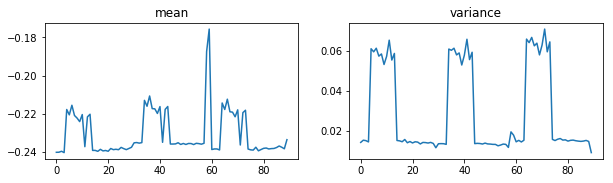

In [14]:
original_data_mean = np.mean(real_data, axis=0)
original_data_variance = np.var(real_data, axis=0)

plt.subplots(1, 2, figsize=(10, 2.5))
plt.subplot(1, 2, 1)
plt.title('mean')
plt.plot(original_data_mean)
plt.subplot(1, 2, 2)
plt.title('variance')
plt.plot(original_data_variance)

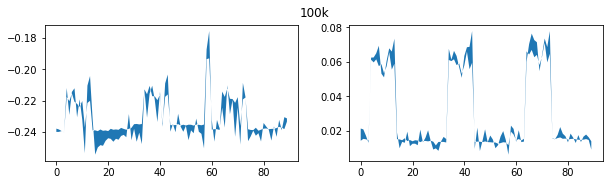

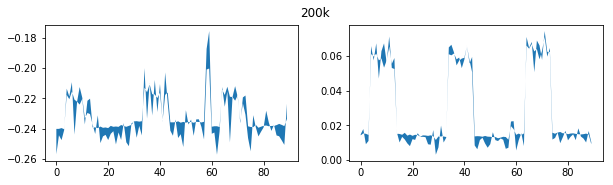

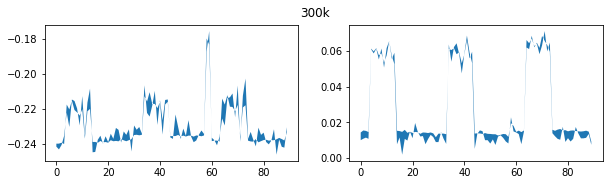

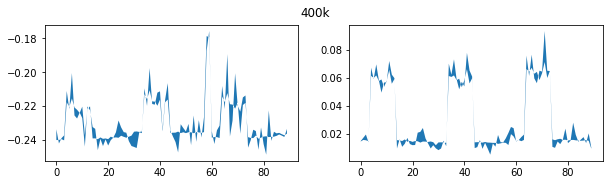

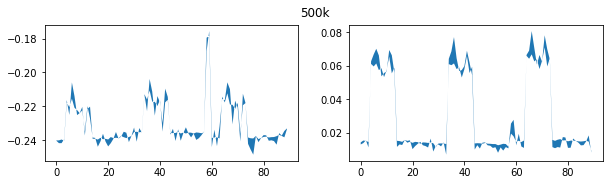

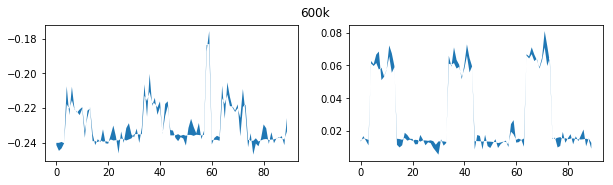

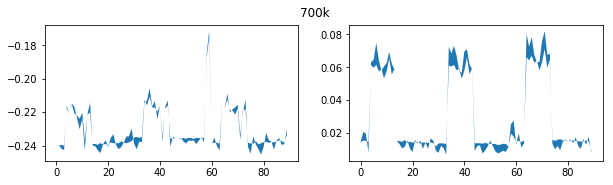

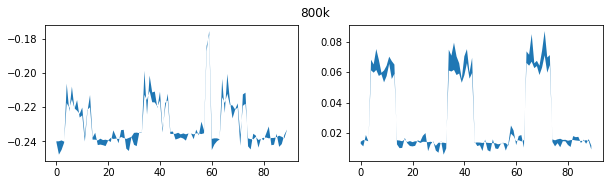

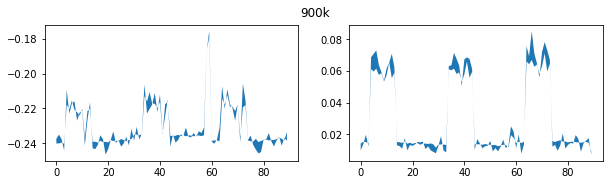

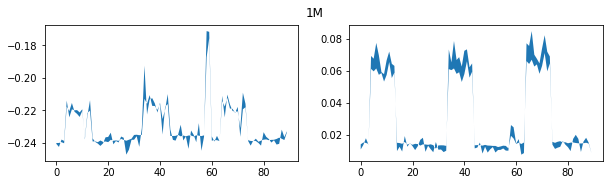

In [24]:
x = np.arange(0.0, 90, 1)

statistics = []

for index, filename in enumerate(generated_data_filepaths):
    generated_data = np.load(filename)
    label = labels[index]

    generated_data_mean = np.mean(generated_data, axis=0)
    generated_data_variance = np.var(generated_data, axis=0)

    plt.subplots(1, 2, figsize=(10, 2.5))
    plt.subplot(1, 2, 1)
    plt.fill_between(x, original_data_mean, generated_data_mean)
    plt.subplot(1, 2, 2)
    plt.fill_between(x, original_data_variance, generated_data_variance)
    plt.suptitle(label)
#     plt.tight_layout()
    plt.show()
    
    total_mean_difference = np.mean(np.square(generated_data_mean - original_data_mean))
    total_variance_difference = np.mean(np.square(generated_data_variance - original_data_variance))

    statistics.append((label, total_mean_difference, total_variance_difference))
statistics = np.array(statistics)

## statistics errors

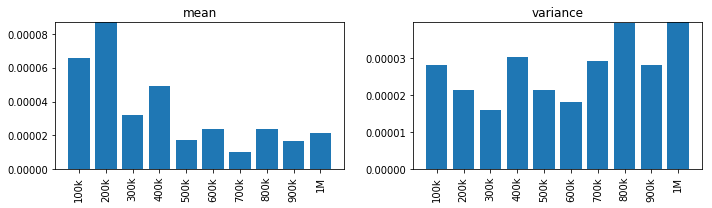

In [26]:
N = statistics.shape[0]

plt.subplots(1, 2, figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.title('mean')
plt.bar(range(N), statistics[:, 1].astype(float))
plt.ylim([0, np.max(statistics[:, 1].astype(float))])
plt.xticks(range(N), statistics[:,0].tolist(), rotation=90)

plt.subplot(1, 2, 2)
plt.title('variance')
plt.bar(range(N), statistics[:, 2].astype(float))
plt.ylim([0, np.max(statistics[:, 2].astype(float))])
plt.xticks(range(N), statistics[:,0].tolist(), rotation=90)
plt.tight_layout()
plt.show()